## <center>КУРСОВОЙ ПРОЕКТ<a class="anchor" id="practice"></a><center>

**Подключение библиотек и скриптов**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pylab
#import scipy.stats as stats
from scipy.stats import probplot
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

**Пути к директориям и файлам**

In [3]:
#input
DATASET_PATH = 'D:\GeekBrains\Courses\Probability and Mathematics Statistics\Course project\\insurance.csv'


**Загрузка данных**

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Просмотр содержимого датасета**

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

**Перевод категориального признака smoker в количественный**

In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
df.loc[df['smoker'] == 'yes',  'smoker'] = 1 

In [10]:
df.loc[df['smoker'] == 'no',  'smoker'] = 0 

In [11]:
df['smoker'] = df.smoker.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 68.1+ KB


In [13]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

**Создание нового признака**

In [14]:
df['age_to_bmi'] = df['age'] * (df['bmi'] - 10)
df['age_to_bmi']

0        340.100
1        427.860
2        644.000
3        419.265
4        604.160
          ...   
1333    1048.500
1334     394.560
1335     483.300
1336     331.800
1337    1163.270
Name: age_to_bmi, Length: 1338, dtype: float64

In [15]:
df.loc[df['smoker'] == 0,  'age_to_bmi'] = df['age_to_bmi']/3

**Выделение целевой переменной и признаков**

In [16]:
FEATURE_NAMES = ['age','sex', 'bmi','children','smoker','region', 'age_to_bmi']
FEATURE_NAMES

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_to_bmi']

In [17]:
NUM_FEATURE_NAMES = ['age','bmi','children', 'smoker', 'age_to_bmi']
NUM_FEATURE_NAMES

['age', 'bmi', 'children', 'smoker', 'age_to_bmi']

In [18]:
target = ['charges']
target

['charges']

In [19]:
X = pd.DataFrame(df, columns=FEATURE_NAMES)
X.head()

,age,sex,bmi,children,smoker,region,age_to_bmi
0,19,female,27.900,0,1,southwest,340.100000
1,18,male,33.770,1,0,southeast,142.620000
2,28,male,33.000,3,0,southeast,214.666667
3,33,male,22.705,0,0,northwest,139.755000
4,32,male,28.880,0,0,northwest,201.386667


In [20]:
y = pd.DataFrame(df, columns=target)
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [21]:
TARGET_NAME = 'charges'
TARGET_NAME

'charges'

**Графический анализ данных**

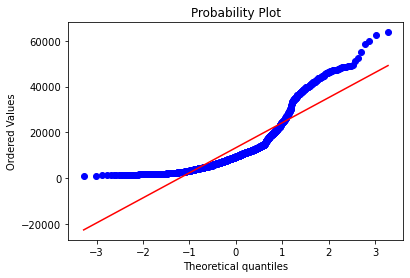

In [22]:
probplot(df['charges'], dist='norm', plot=pylab)
pylab.show()

Распределение целевой переменной отлично от нормального

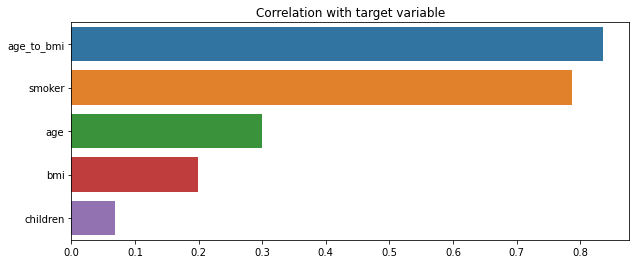

In [23]:
corr_with_target = df[NUM_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 4))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Слабая корреляция признаков с целевой переменной за исключением smoker и age_to_bmi

<function matplotlib.pyplot.show(*args, **kw)>

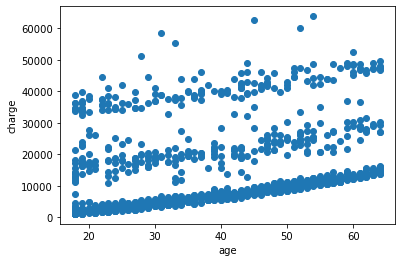

In [24]:
plt.scatter(df['age'],y)
plt.xlabel('age')
plt.ylabel('charge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

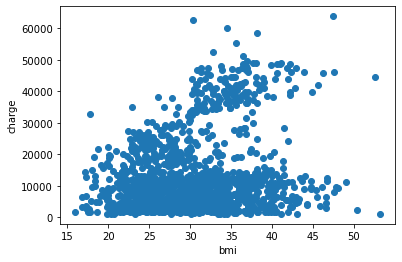

In [25]:
plt.scatter(df['bmi'],y)
plt.xlabel('bmi')
plt.ylabel('charge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

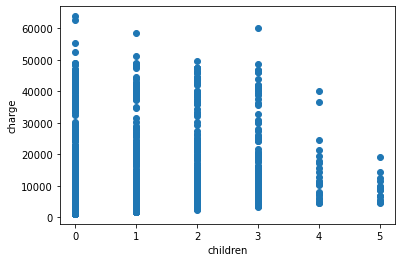

In [26]:
plt.scatter(df['children'],y)
plt.xlabel('children')
plt.ylabel('charge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

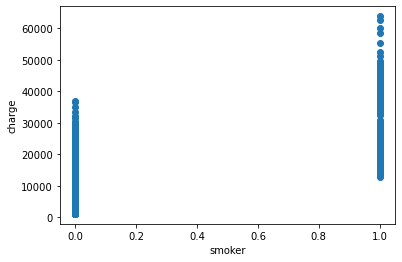

In [27]:
plt.scatter(df['smoker'],y) 
plt.xlabel('smoker')
plt.ylabel('charge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

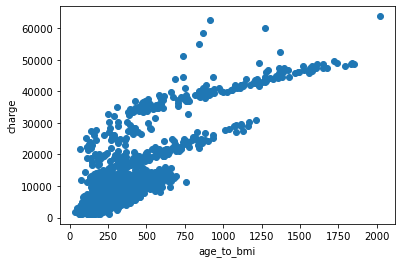

In [28]:
plt.scatter(df['age_to_bmi'],y) 
plt.xlabel('age_to_bmi')
plt.ylabel('charge')
plt.show

Нет явной линейной зависимости между признаками и целевой переменной, кроме smoke и age_to_bmi

**Построение модели линейной регрессии**

In [29]:
X = pd.DataFrame(df, columns=NUM_FEATURE_NAMES)
X.head()
X = np.hstack([np.ones((1338,1)),X]) 
X

array([[1.00000000e+00, 1.90000000e+01, 2.79000000e+01, 0.00000000e+00,
        1.00000000e+00, 3.40100000e+02],
       [1.00000000e+00, 1.80000000e+01, 3.37700000e+01, 1.00000000e+00,
        0.00000000e+00, 1.42620000e+02],
       [1.00000000e+00, 2.80000000e+01, 3.30000000e+01, 3.00000000e+00,
        0.00000000e+00, 2.14666667e+02],
       ...,
       [1.00000000e+00, 1.80000000e+01, 3.68500000e+01, 0.00000000e+00,
        0.00000000e+00, 1.61100000e+02],
       [1.00000000e+00, 2.10000000e+01, 2.58000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.10600000e+02],
       [1.00000000e+00, 6.10000000e+01, 2.90700000e+01, 0.00000000e+00,
        1.00000000e+00, 1.16327000e+03]])

In [30]:
y = np.array(y)
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [31]:
b = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
b # ~ 5.88982042 Интерцепт

array([[  859.1583529 ],
       [   67.73756783],
       [  -32.02250471],
       [  452.17132679],
       [13287.34433506],
       [   19.64961781]])

In [32]:
y_hat = b[0]+b[1]*X[:,1:2]+b[2]*X[:,2:3]+b[3]*X[:,3:4]+b[4]*X[:,4:5]+b[5]*X[:,5:6]
y_hat # Расчётные значения целевой переменной.

array([[21222.92361124],
       [ 4251.63440804],
       [ 7273.69953276],
       ...,
       [ 4063.9587038 ],
       [ 3628.71438512],
       [40205.41101934]])

**Оценка статистической значимости модели**

In [33]:
df1 = 6 - 1 
df1 # = 5 Степень свободы числителя

5

In [34]:
n = 1338
df2 = n - 6
df2 # = 1332 Степень свободы знаменателя

1332

In [35]:
SS_f = ((y_hat-np.mean(y))**2).sum()
SS_f # ~ 153681696895.24 Фактическая сумма квадратных отклонений

153681696895.24084

In [36]:
SS_r = ((y-y_hat)**2).sum()
SS_r # ~ 42392524673.13 Остаточная сумма квадратных отклонений

42392524673.12692

In [37]:
MS_f = SS_f/df1
MS_f # ~ 30736339379.05 Фактическая сумма квадратных отклонений на одну степень свободы

30736339379.04817

In [38]:
MS_r = SS_r/df2
MS_r # ~ 31826219.72 Остаточная сумма квадратных отклонений на одну степень свободы

31826219.72456976

In [39]:
F_f = MS_f/MS_r
F_f # ~ 965.75 F фактическое

965.7552686133123

In [40]:
F_t = 2.61 # F табличное
# F_f > F_t 

Вывод: Данная модель линейной регрессии статистически значимая, alpha = 0.05

**Коэффициент детерминации**

In [41]:
R2 = r2_score(y,y_hat) # Расчёт R2 с помощью библиотеки sklearn.metrics
R2 # ~ 0.78

0.7837934822128287

**Среднеквадратичная ошибка**

In [42]:
n = 1338
mse = ((y-y_hat)**2).sum()/n
mse # ~ 31683501.25

31683501.250468552

In [43]:
mse = mean_squared_error(y,y_hat) # Расчёт mse с помощью библиотеки sklearn.metrics
mse # ~ 31683501.25

31683501.250468552

**Вывод**

Если судить по метрике R2, то модель линейной регрессии получилась неплохой, благодаря переводу категориального признака smoker в количественный и созданию нового признака хорошо коррелирующего с целевой переменной